# First go with Tensorflow
This JPNoteBook is my first attempt to use Tensorflow

## Setup example
simple example using Tensorflow. Useful to test everything works.

In [1]:
import tensorflow as tf


mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)



2023-10-28 18:41:05.328735: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 18:41:05.973883: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 18:41:05.973959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 18:41:05.974264: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 18:41:06.195652: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 18:41:06.203043: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

11490434/11490434 [==============================] - 2s 0us/step


2023-10-28 18:41:18.815451: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 2.2436 - accuracy: 0.7617
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5787 - accuracy: 0.8461
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4958 - accuracy: 0.8648
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4298 - accuracy: 0.8826
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2795 - accuracy: 0.9349


[0.27950799465179443, 0.9348999857902527]

## Image Classification Example
Example for image classification

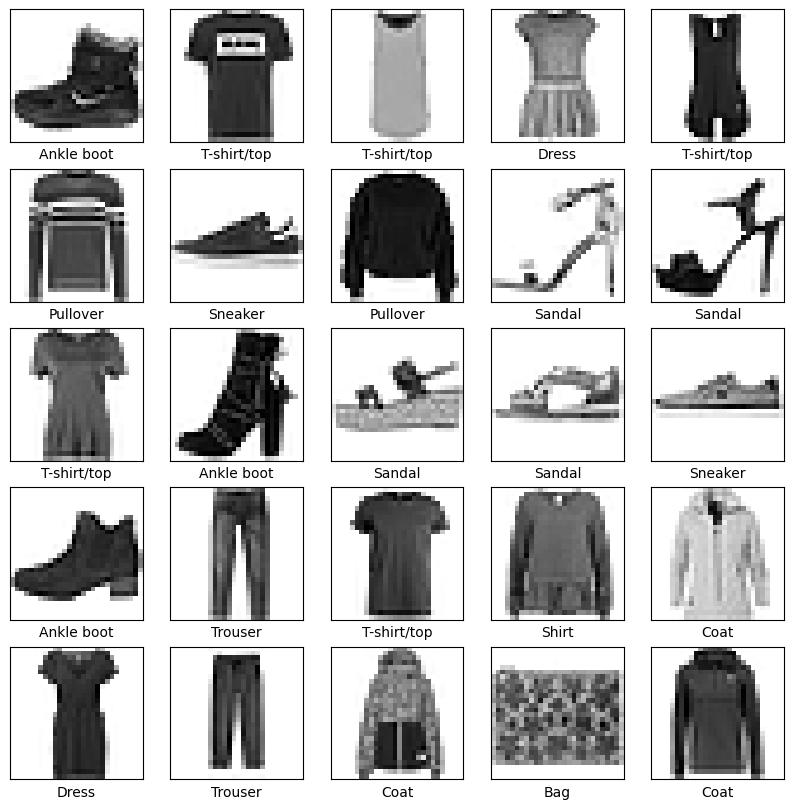

2023-10-28 19:18:33.659651: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5007 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3778 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3354 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3105 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2944 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2773 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2671 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2564 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2460 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

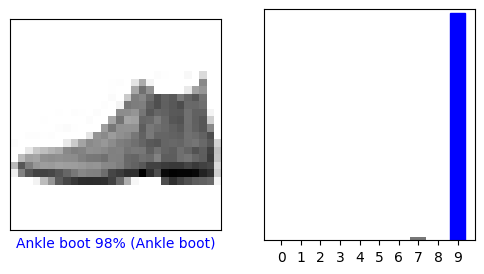

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# import data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images=train_images/255.0
test_images=test_images/255.0

# all the values the labels can take:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# show some input images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# define functions to graph the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')






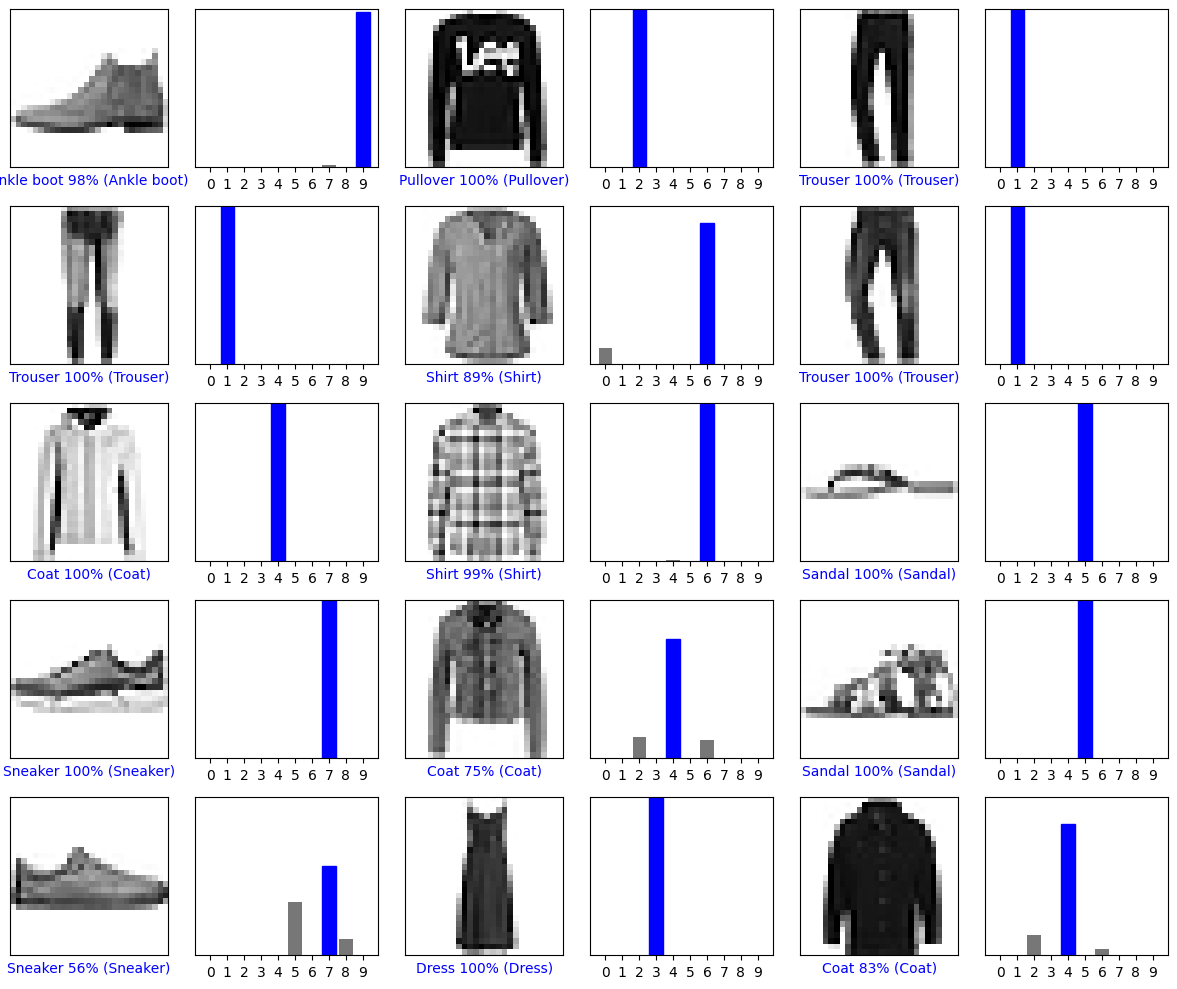

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()